In [2]:
import pickle
import itertools
import os.path as op
from glob import glob

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import gridspec

In [3]:
result_dir = op.abspath("../results")
dec_data_dir = op.join(result_dir, "decoding")

In [4]:
hue_order = [
    'term_neurosynth_Percentile',
    'term_neuroquery_Percentile',
    'term_neurosynth_KMeans', 
    "term_neuroquery_KMeans", 
    "term_neurosynth_KDE", 
    "term_neuroquery_KDE",
    'lda_neurosynth_Percentile',
    'lda_neuroquery_Percentile',
    'lda_neurosynth_KMeans', 
    "lda_neuroquery_KMeans", 
    "lda_neurosynth_KDE", 
    "lda_neuroquery_KDE",
    'gclda_neurosynth_Percentile',
    'gclda_neuroquery_Percentile',
    'gclda_neurosynth_KMeans', 
    "gclda_neuroquery_KMeans", 
    "gclda_neurosynth_KDE", 
    "gclda_neuroquery_KDE",
]

(3, 3228)


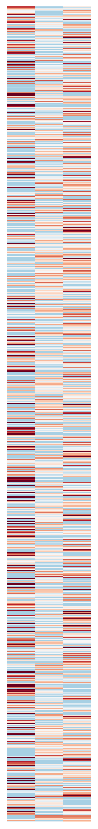

(3, 3228)


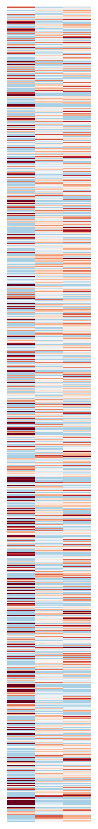

(3, 3228)


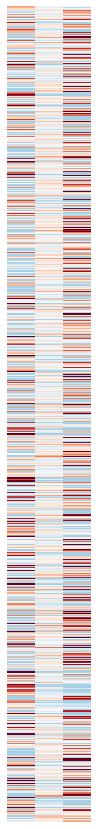

(3, 200)


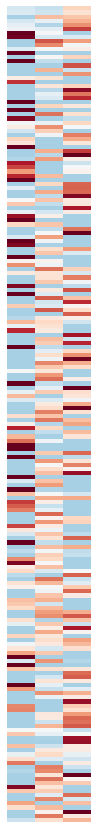

(3, 200)


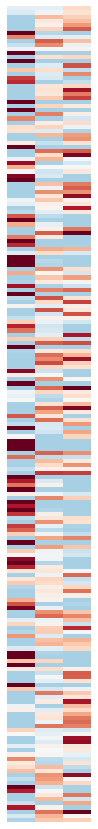

(3, 200)


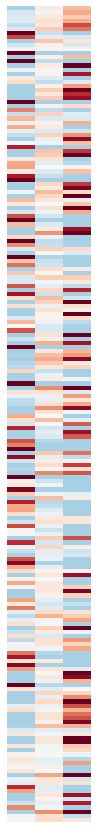

(3, 200)


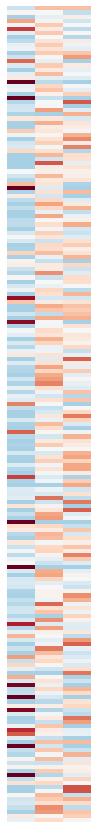

(3, 200)


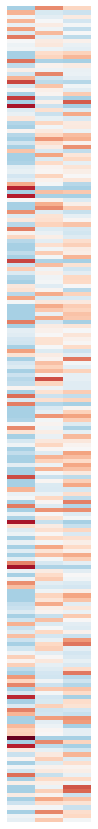

(3, 200)


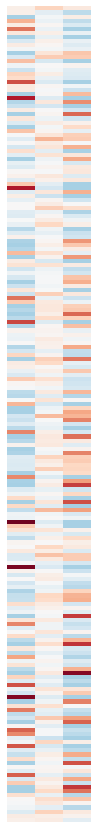

(3, 6145)


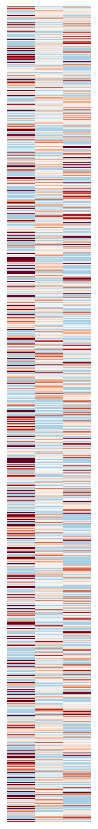

(3, 6145)


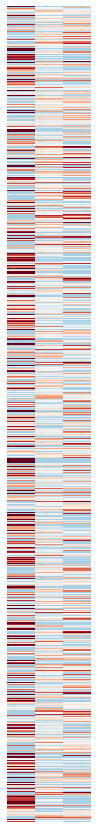

(3, 6145)


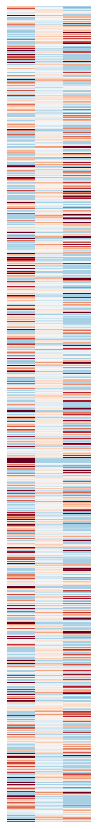

(3, 200)


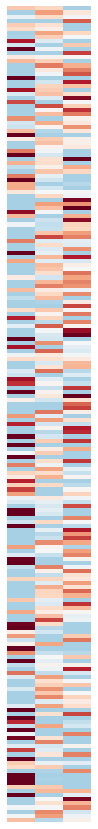

(3, 200)


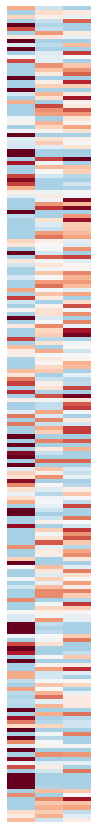

(3, 200)


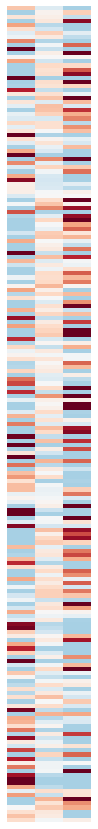

(3, 200)


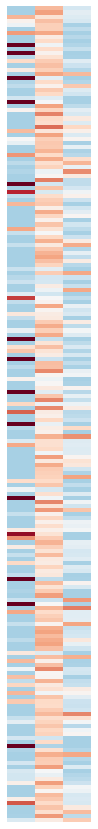

(3, 200)


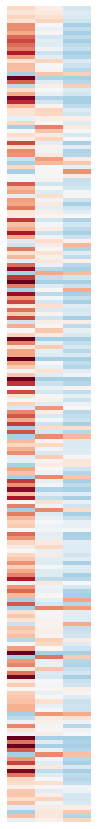

(3, 200)


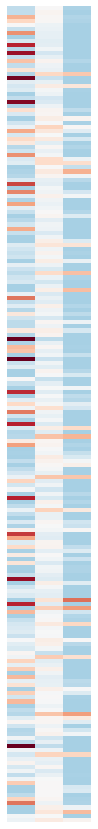

                           method seg_sol      corr
0      term_neurosynth_Percentile       1  0.215554
1      term_neurosynth_Percentile       1  0.091610
2      term_neurosynth_Percentile       1  0.318514
3      term_neurosynth_Percentile       1  0.070797
4      term_neurosynth_Percentile       1  0.207412
...                           ...     ...       ...
91552        gclda_neuroquery_KDE       3 -0.091562
91553        gclda_neuroquery_KDE       3 -0.014256
91554        gclda_neuroquery_KDE       3  0.095816
91555        gclda_neuroquery_KDE       3 -0.142258
91556        gclda_neuroquery_KDE       3  0.011997

[91557 rows x 3 columns]
(17, 3228)


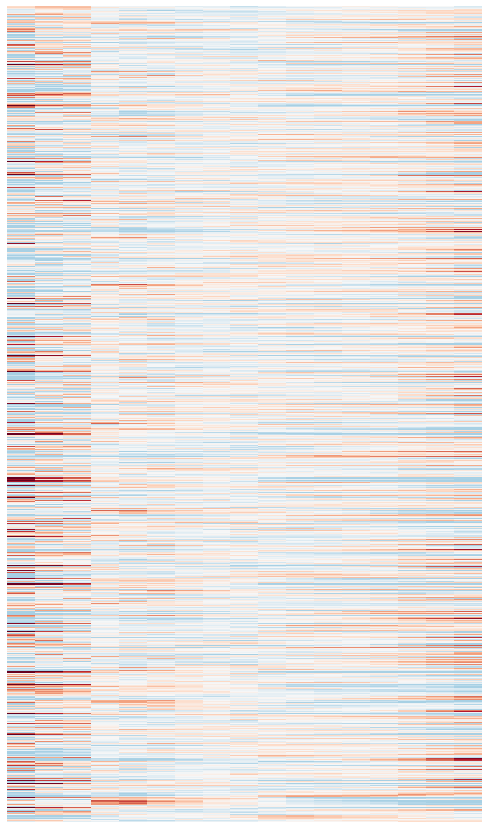

(17, 3228)


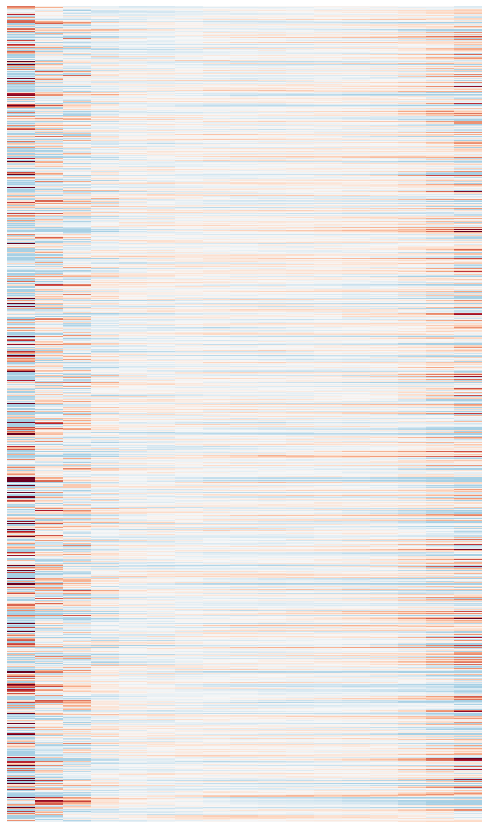

(17, 3228)


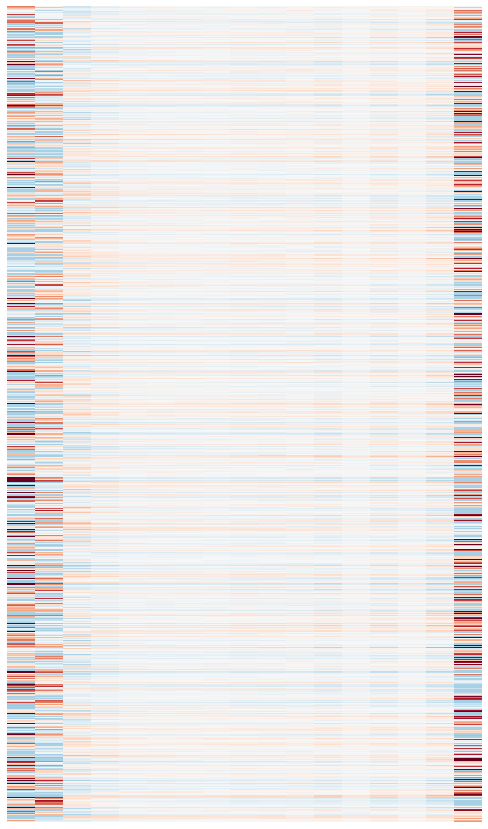

(17, 200)


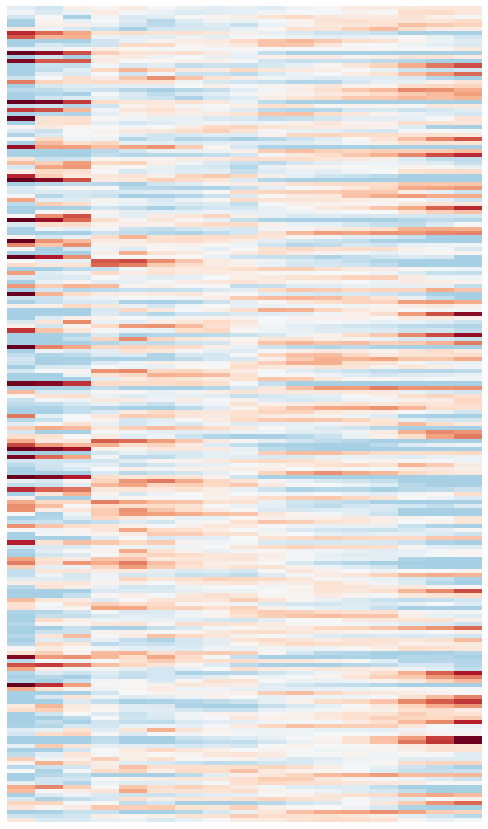

(17, 200)


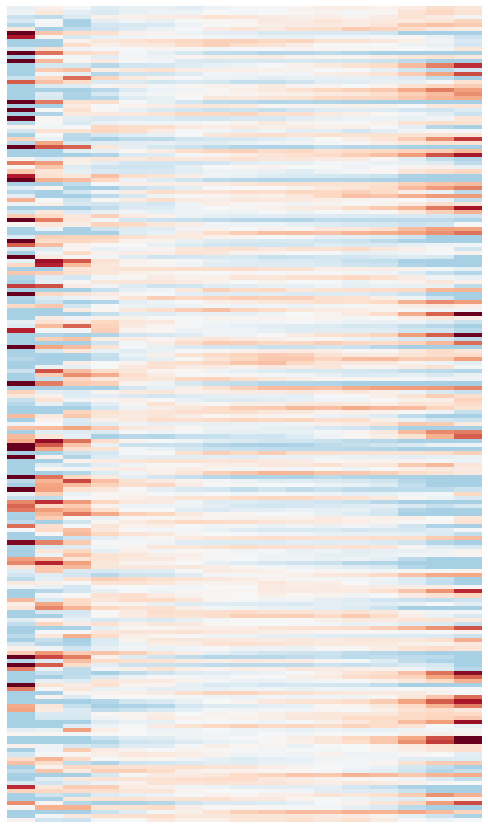

(17, 200)


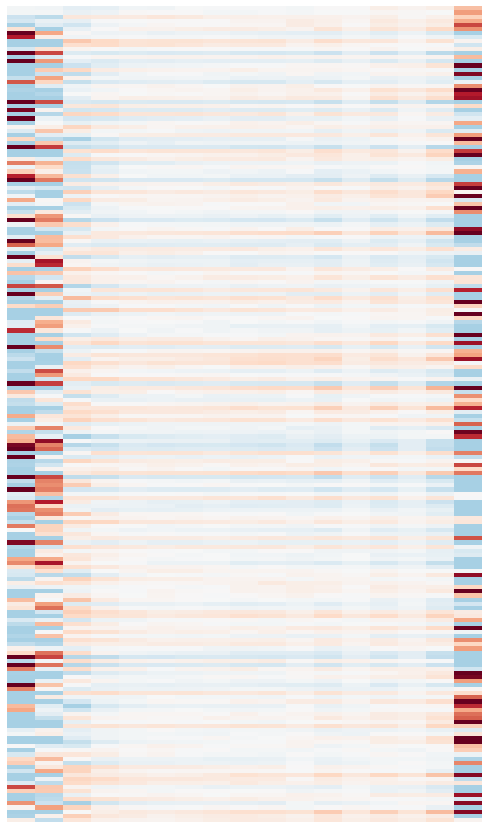

(17, 200)


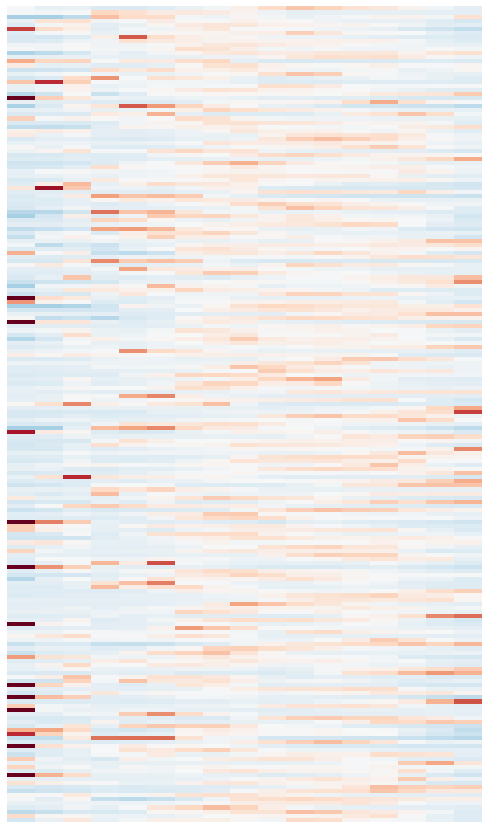

(17, 200)


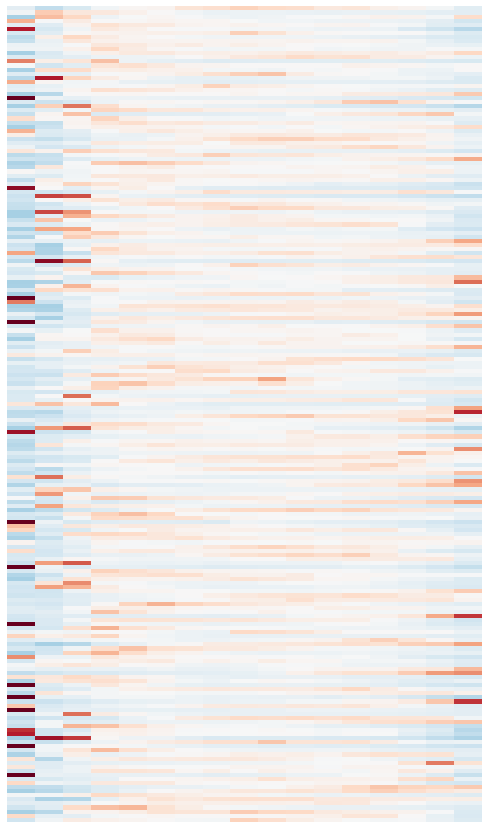

(17, 200)


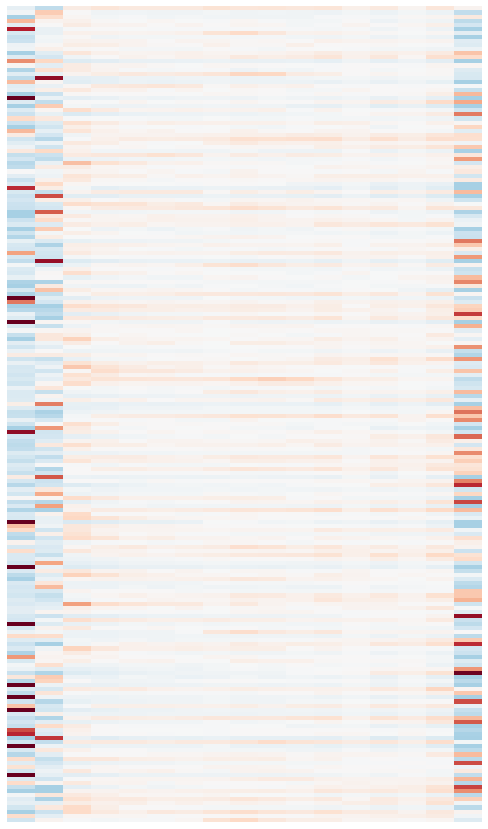

(17, 6145)


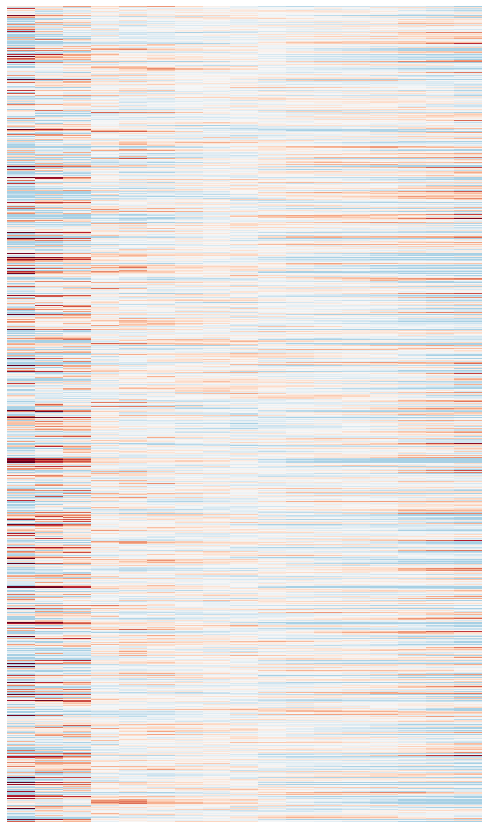

(17, 6145)


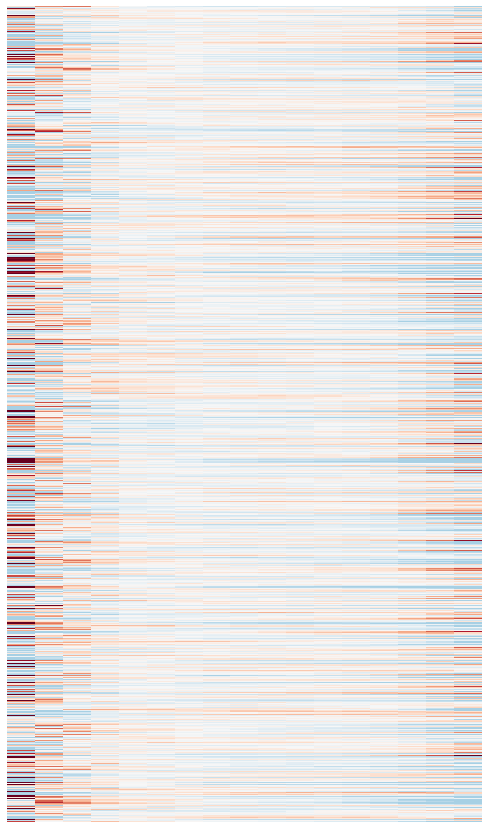

(17, 6145)


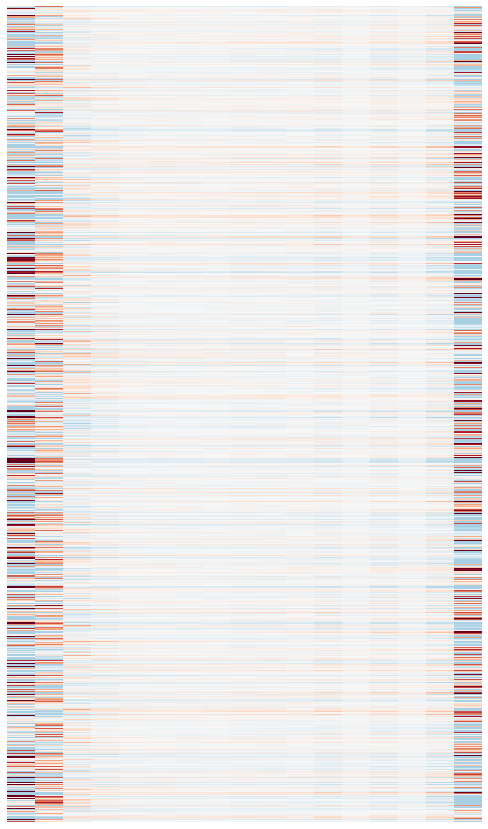

(17, 200)


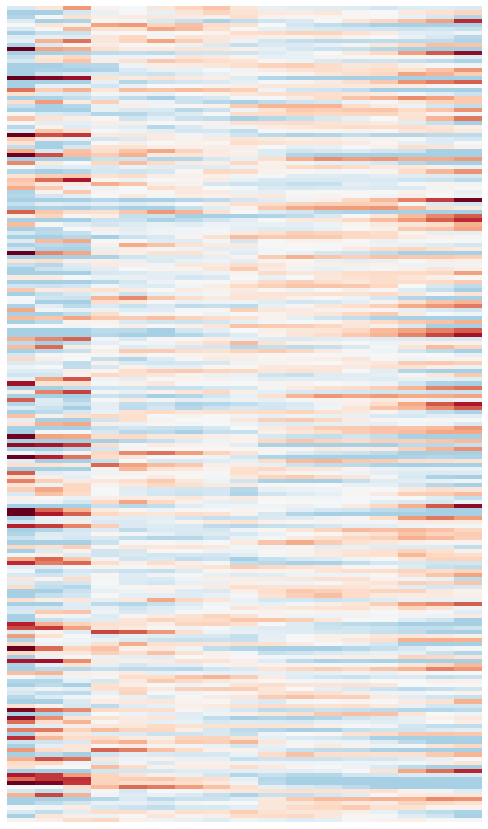

(17, 200)


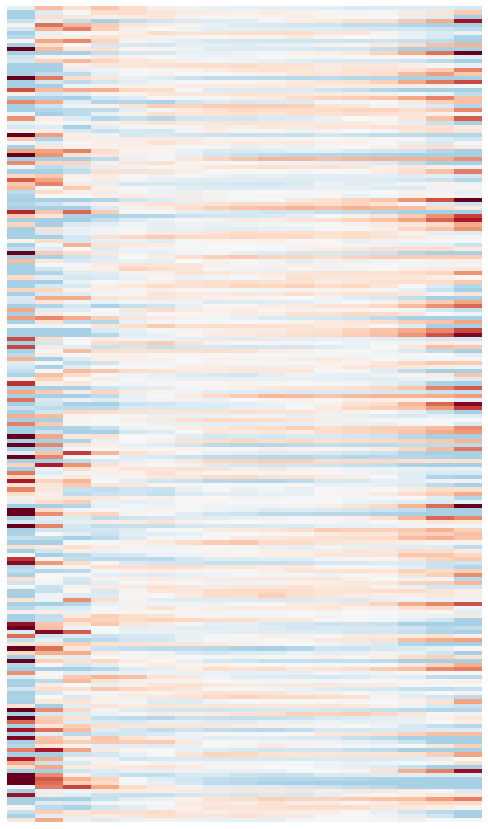

(17, 200)


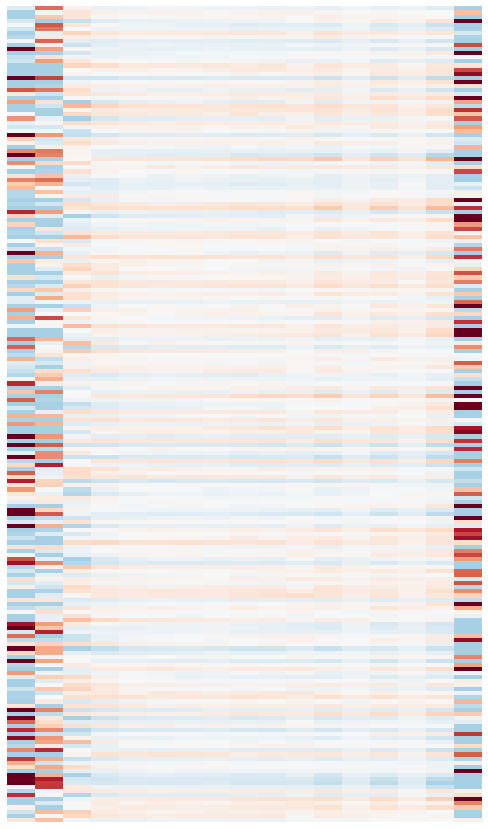

(17, 200)


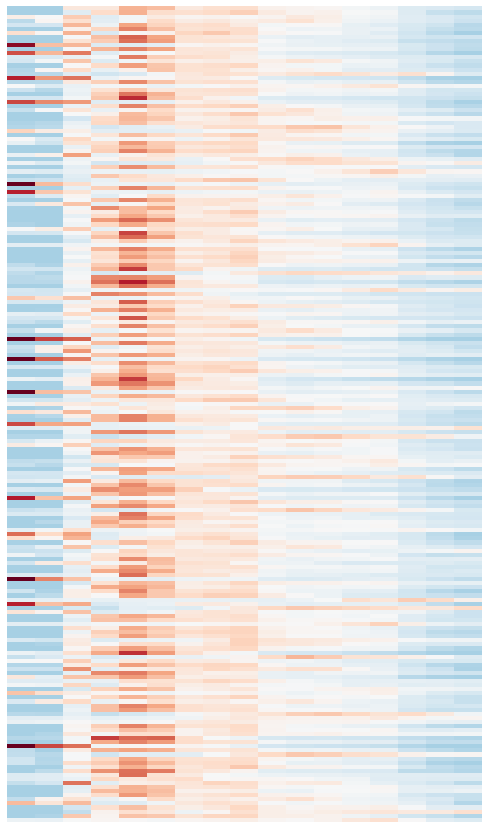

(17, 200)


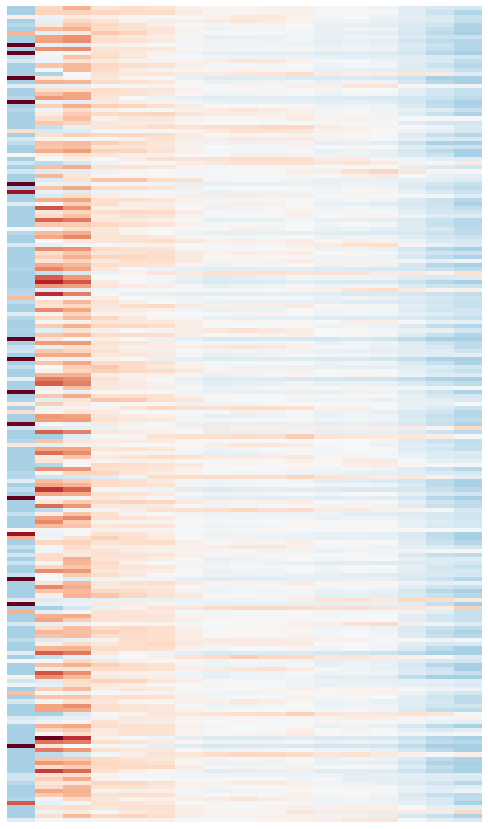

(17, 200)


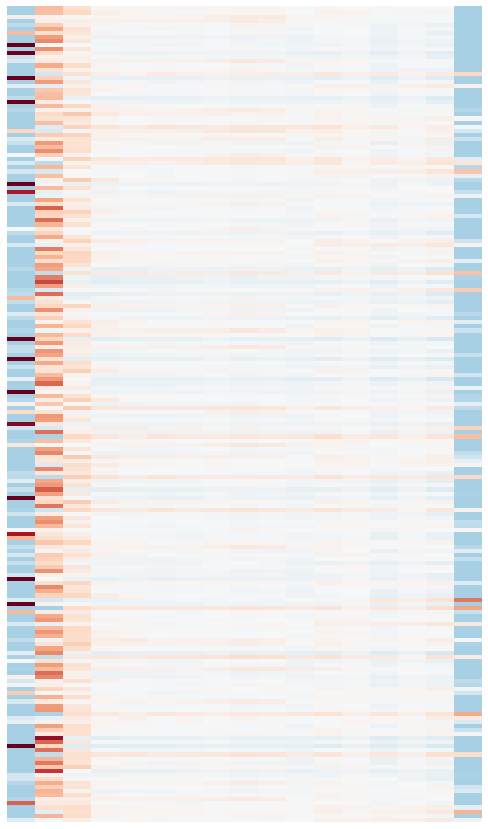

                            method seg_sol      corr
0       term_neurosynth_Percentile       1  0.215554
1       term_neurosynth_Percentile       1  0.091610
2       term_neurosynth_Percentile       1  0.318514
3       term_neurosynth_Percentile       1  0.070797
4       term_neurosynth_Percentile       1  0.207412
...                            ...     ...       ...
610375        gclda_neuroquery_KDE      17 -0.107440
610376        gclda_neuroquery_KDE      17 -0.028555
610377        gclda_neuroquery_KDE      17  0.100131
610378        gclda_neuroquery_KDE      17 -0.152800
610379        gclda_neuroquery_KDE      17 -0.013891

[610380 rows x 3 columns]
(32, 3228)


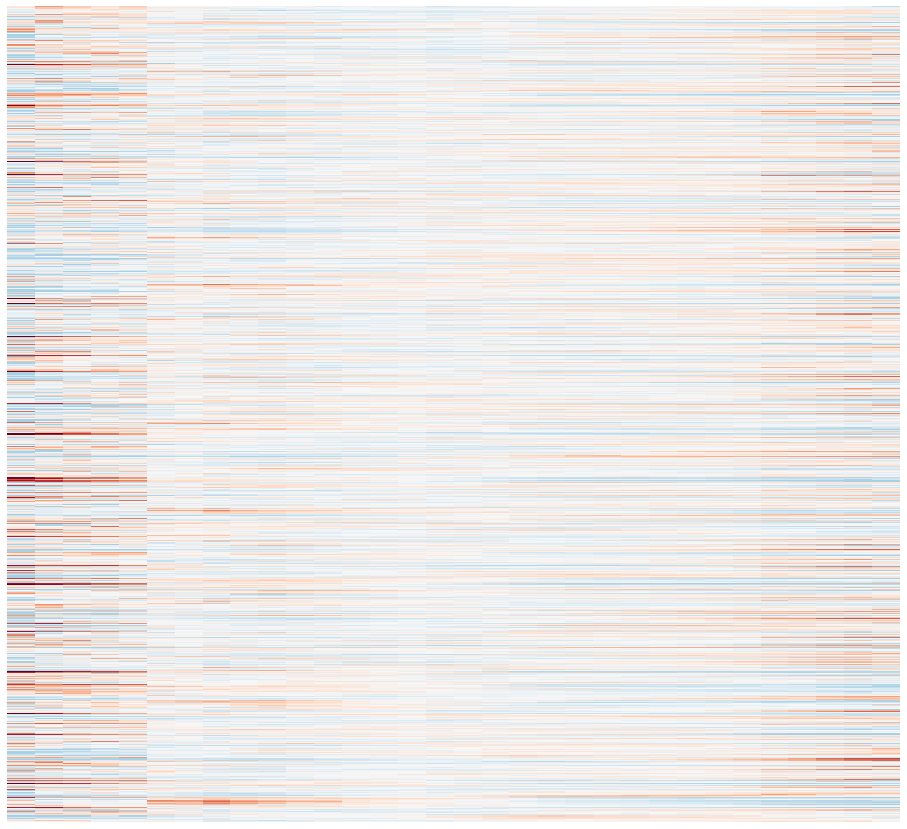

(32, 3228)


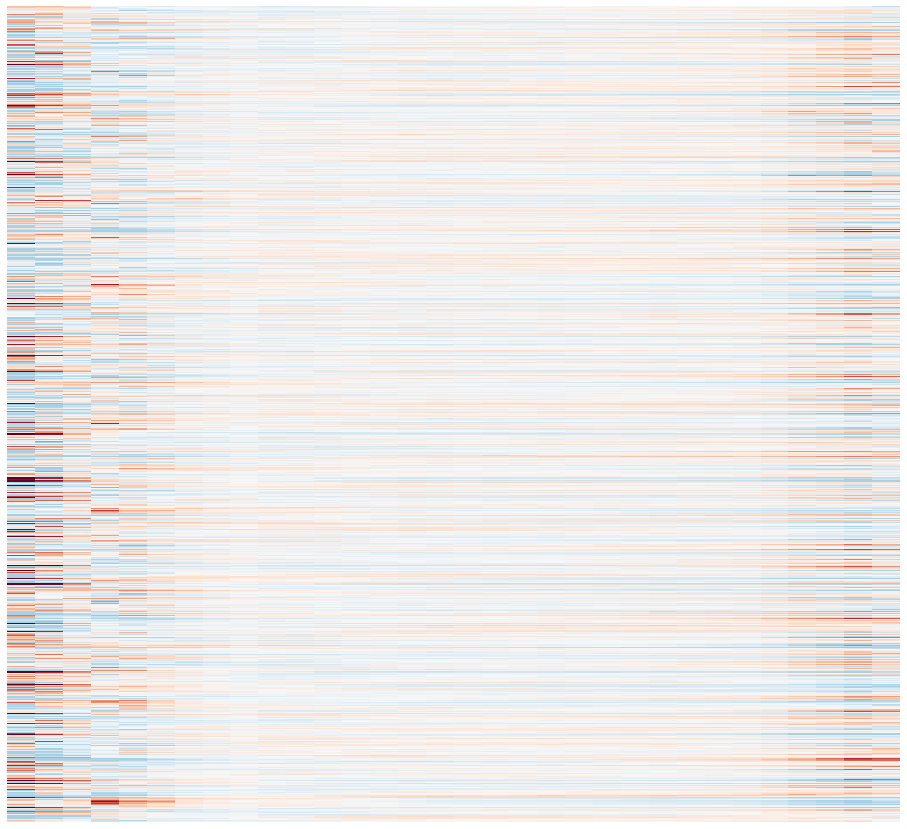

(32, 3228)


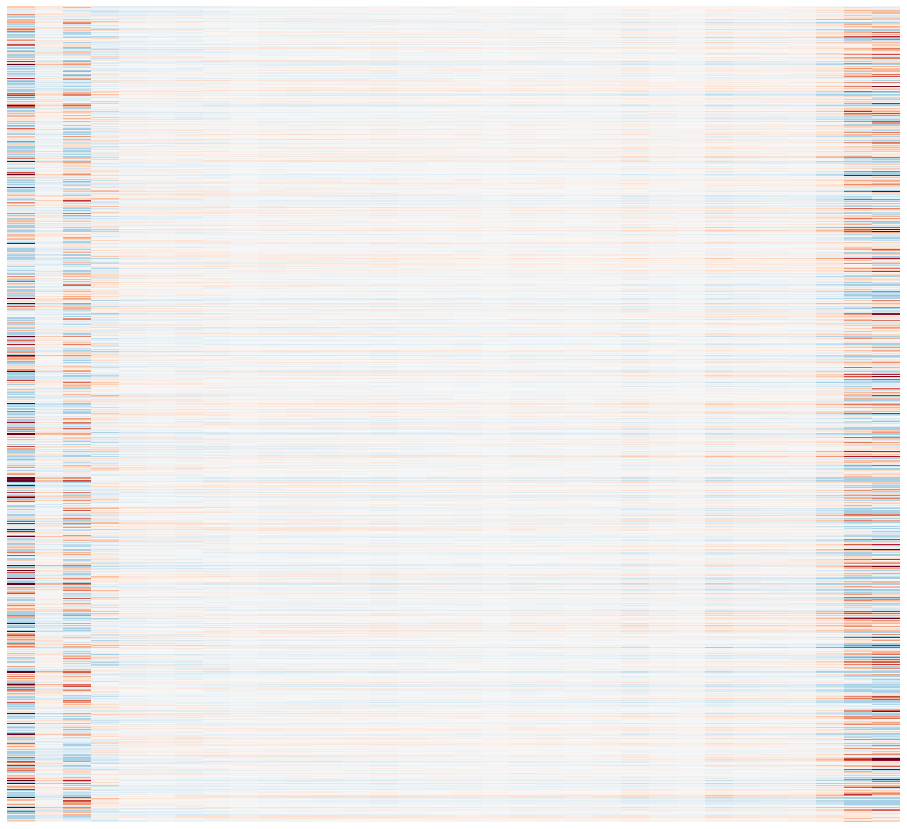

(32, 200)


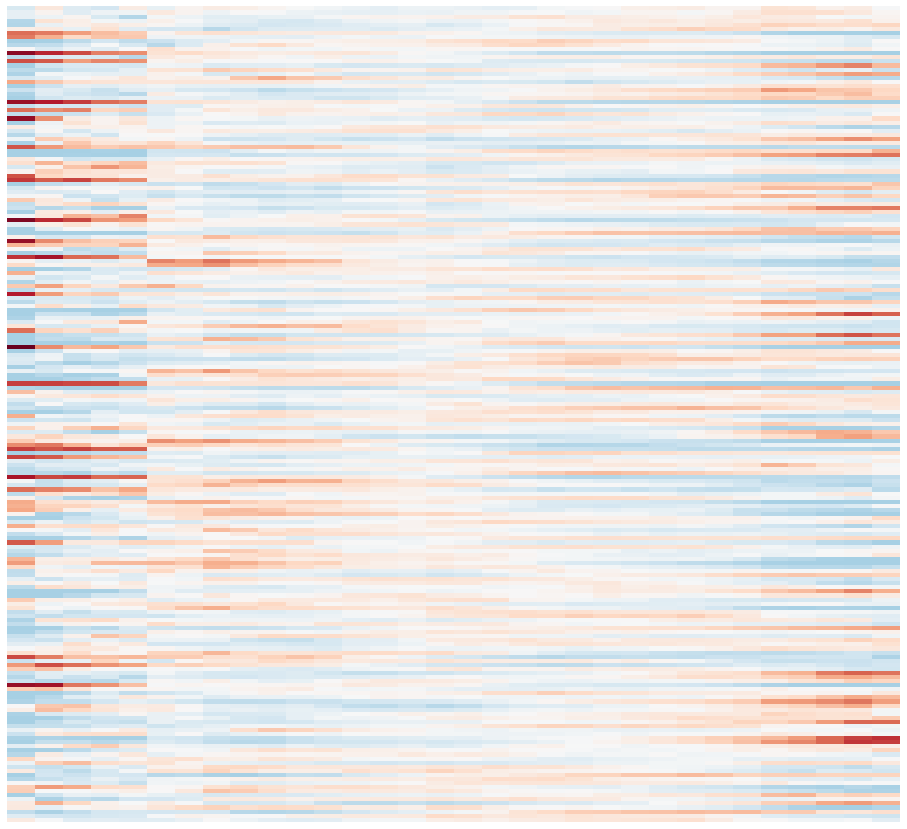

(32, 200)


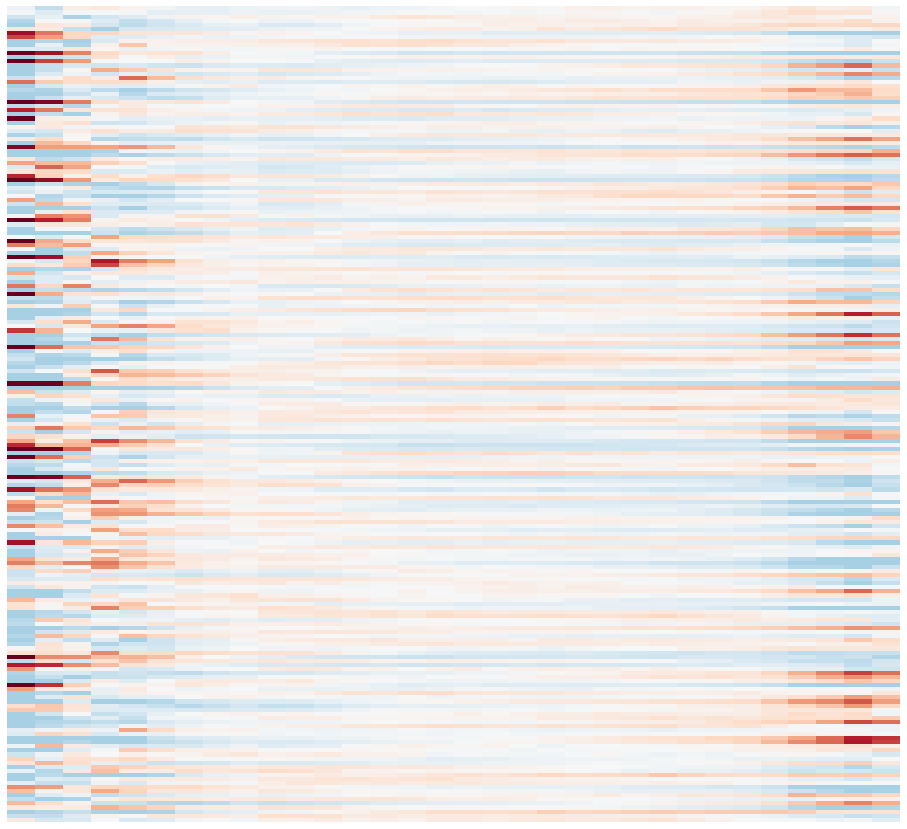

(32, 200)


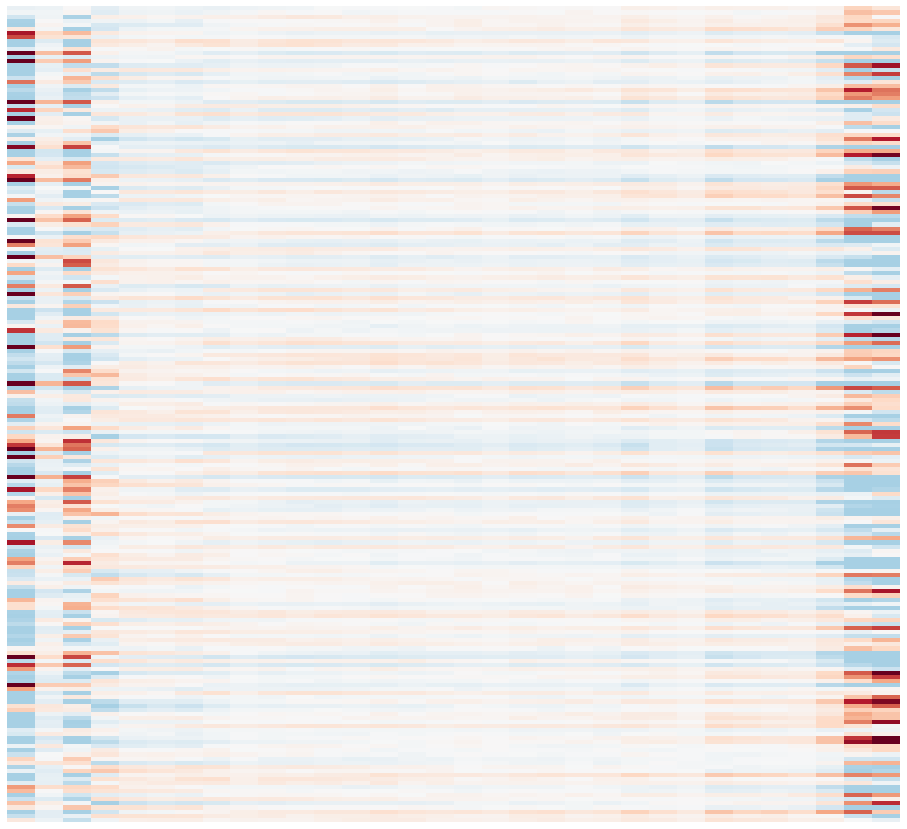

(32, 200)


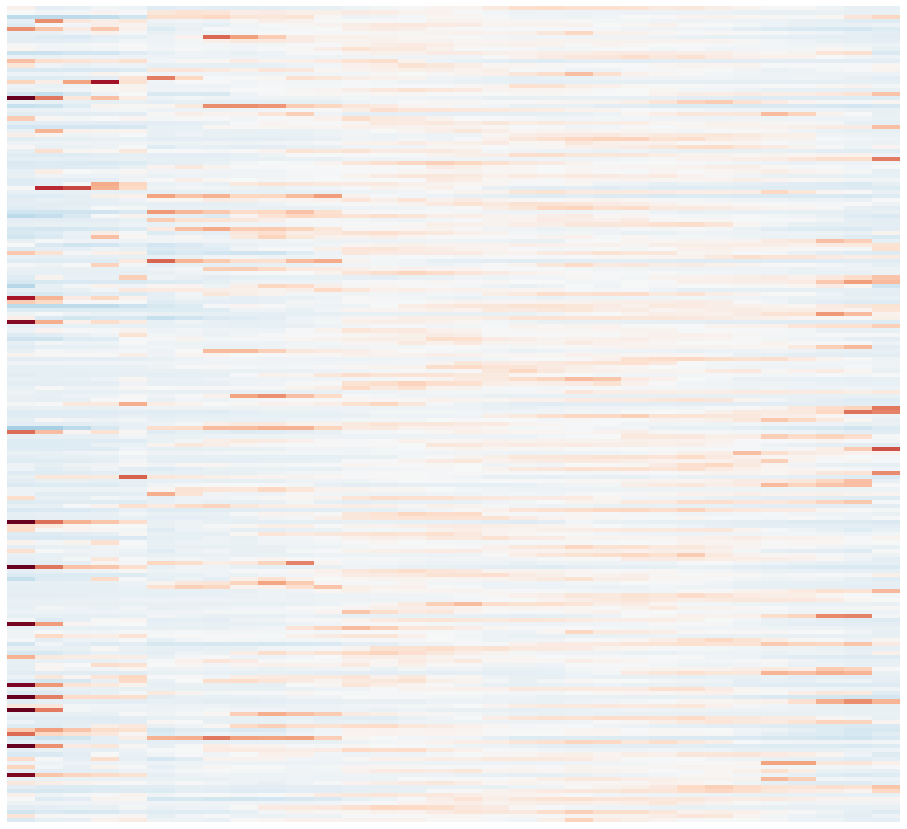

(32, 200)


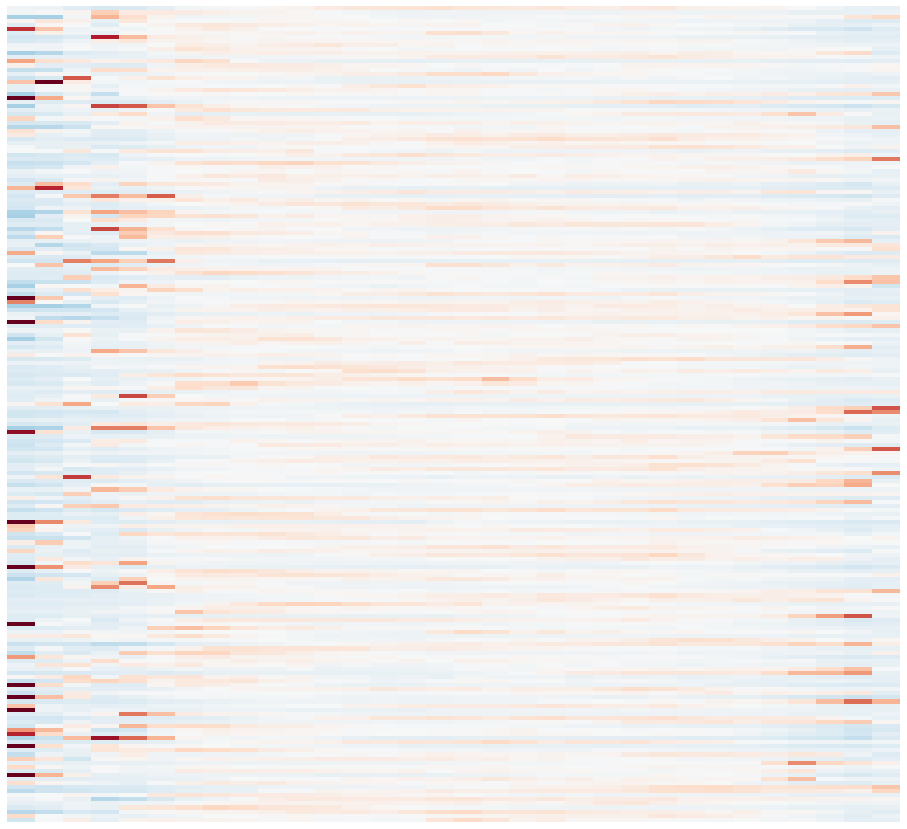

(32, 200)


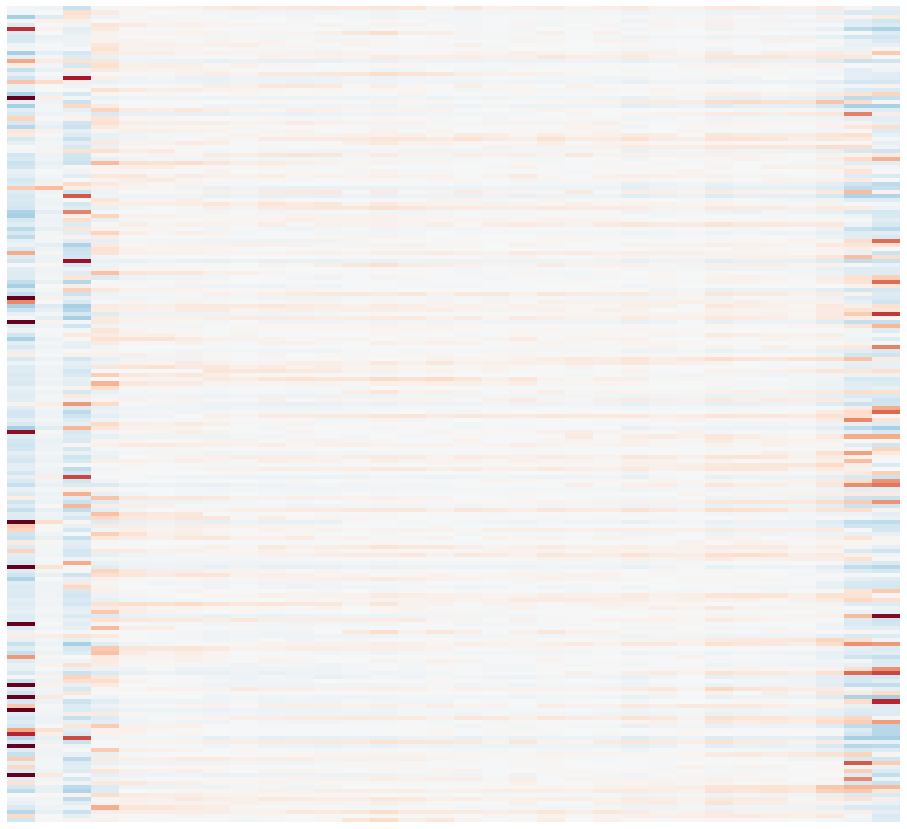

(32, 6145)


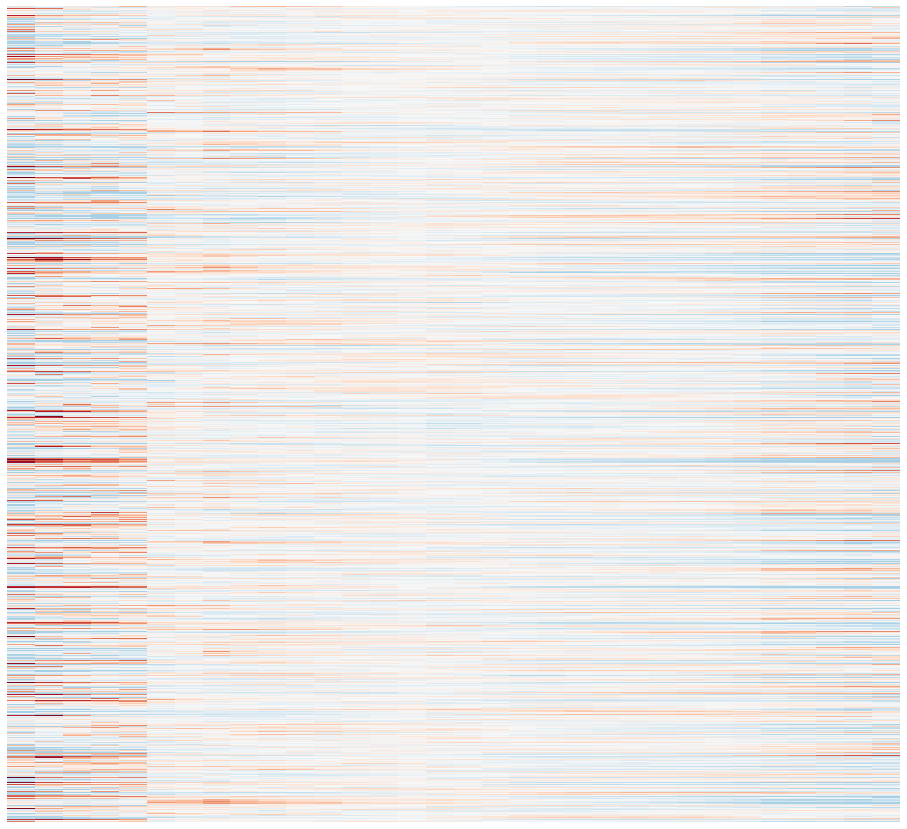

(32, 6145)


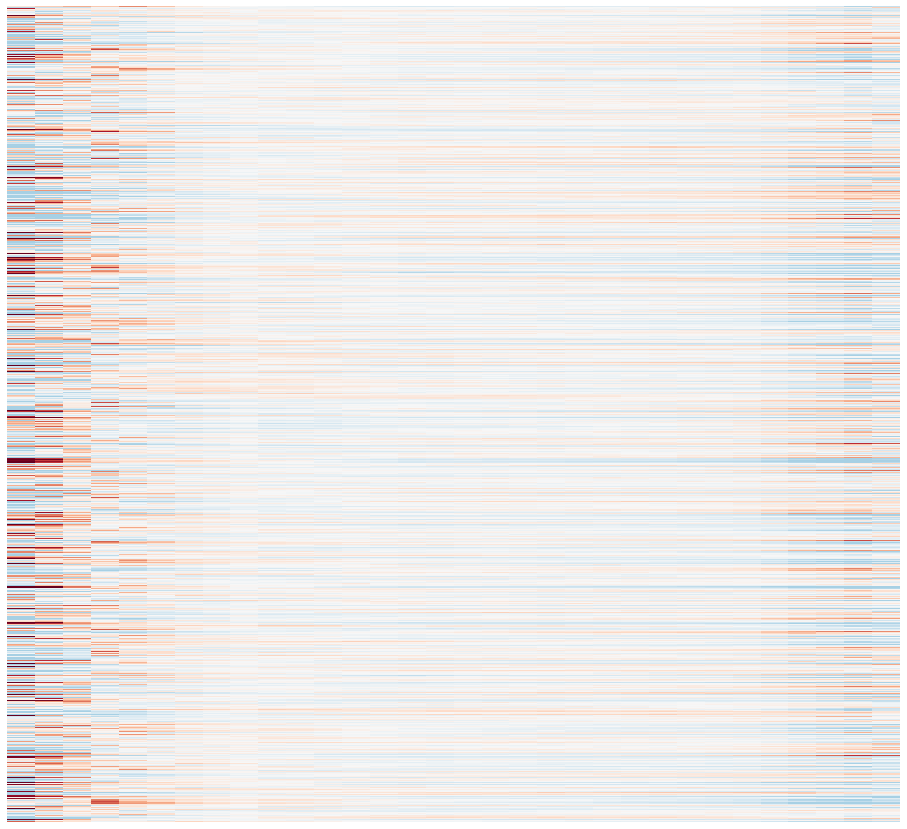

(32, 6145)


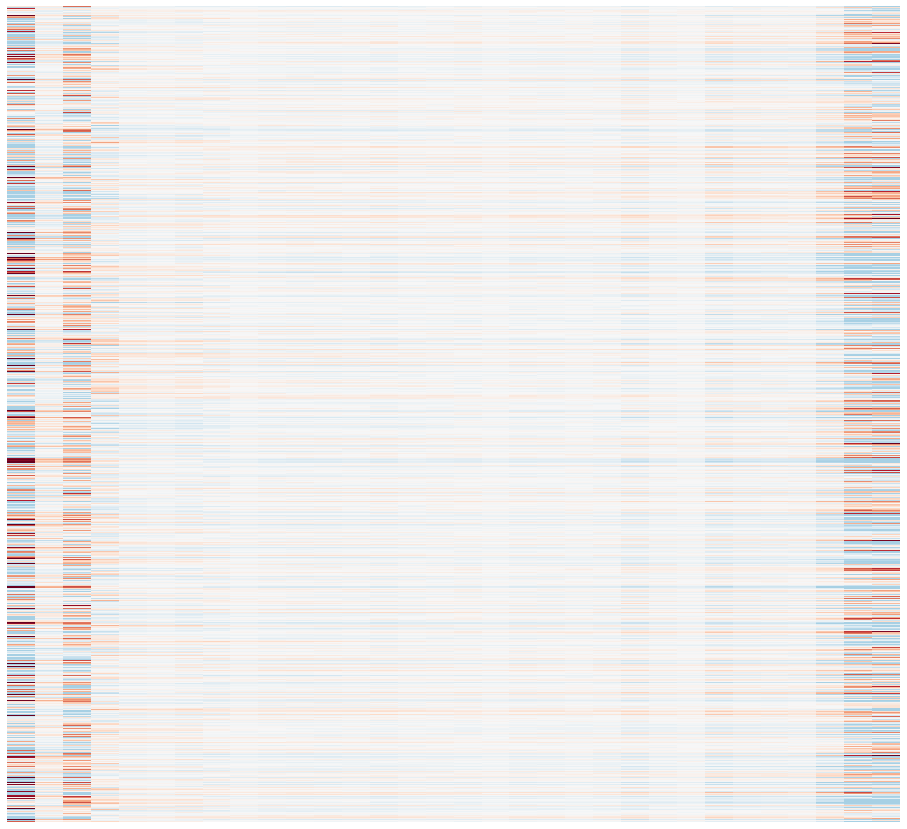

(32, 200)


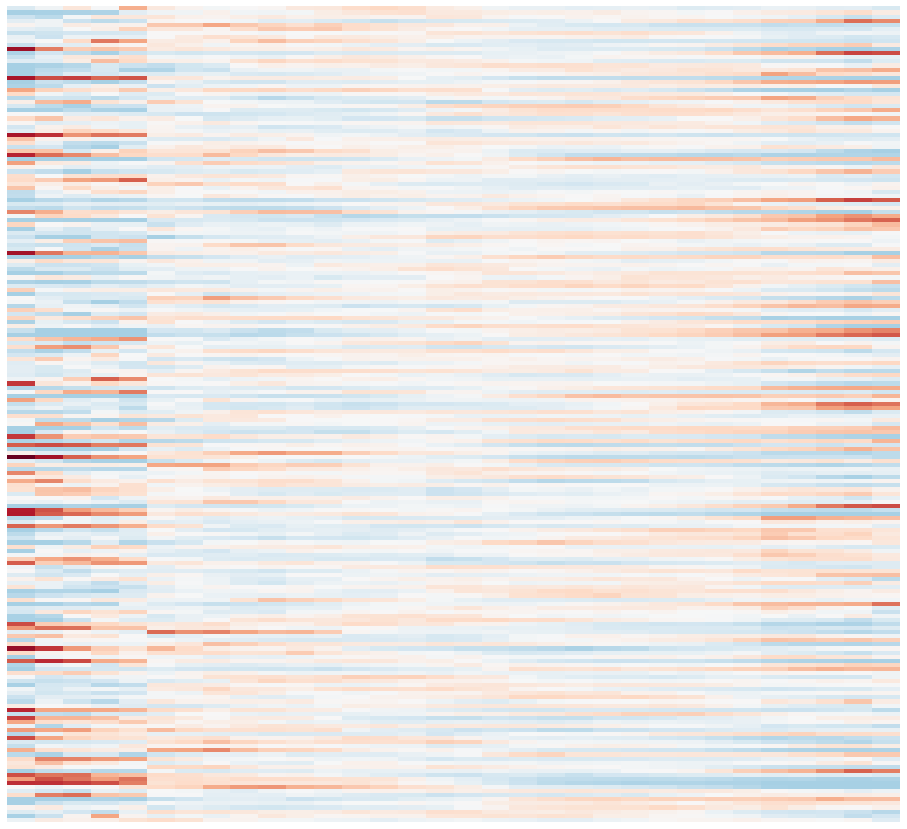

(32, 200)


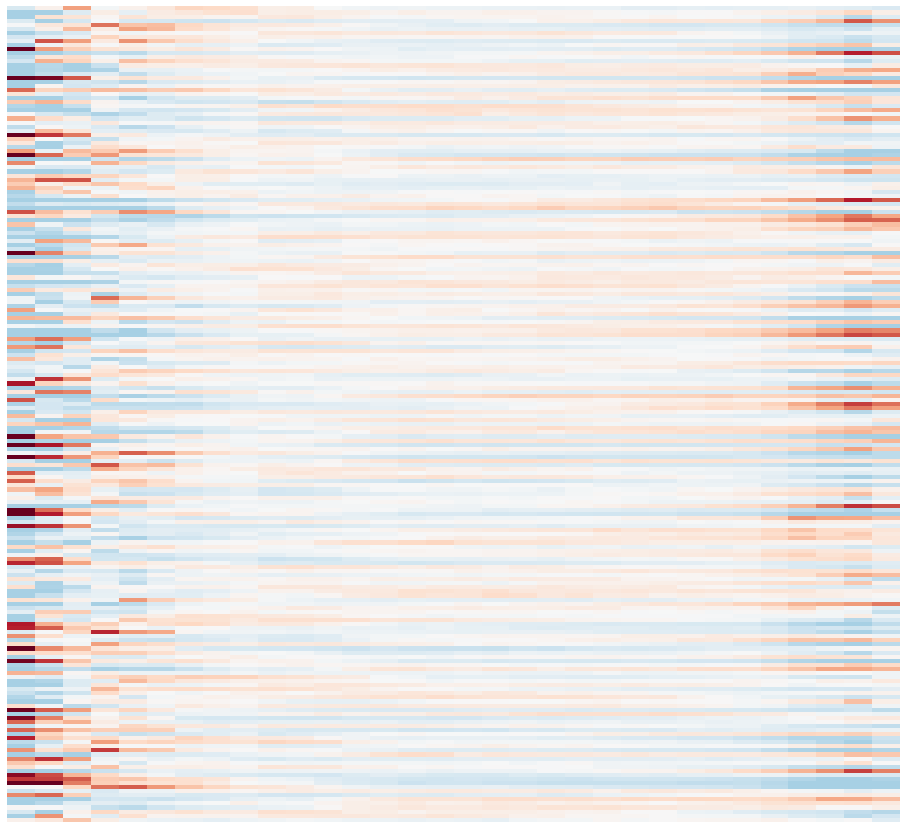

(32, 200)


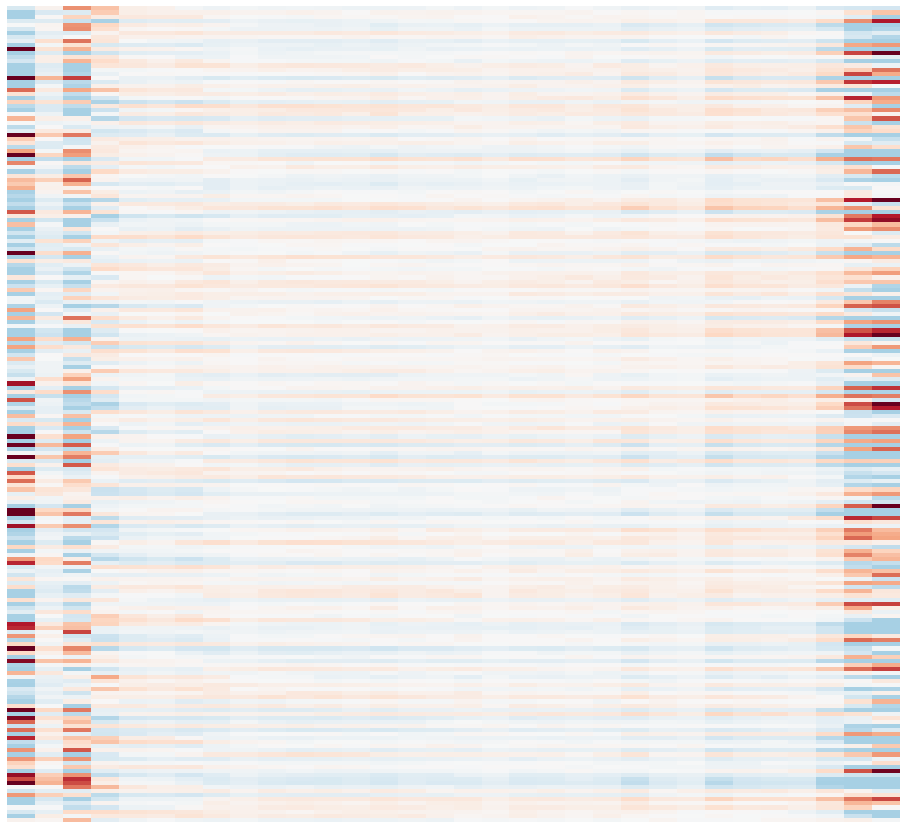

(32, 200)


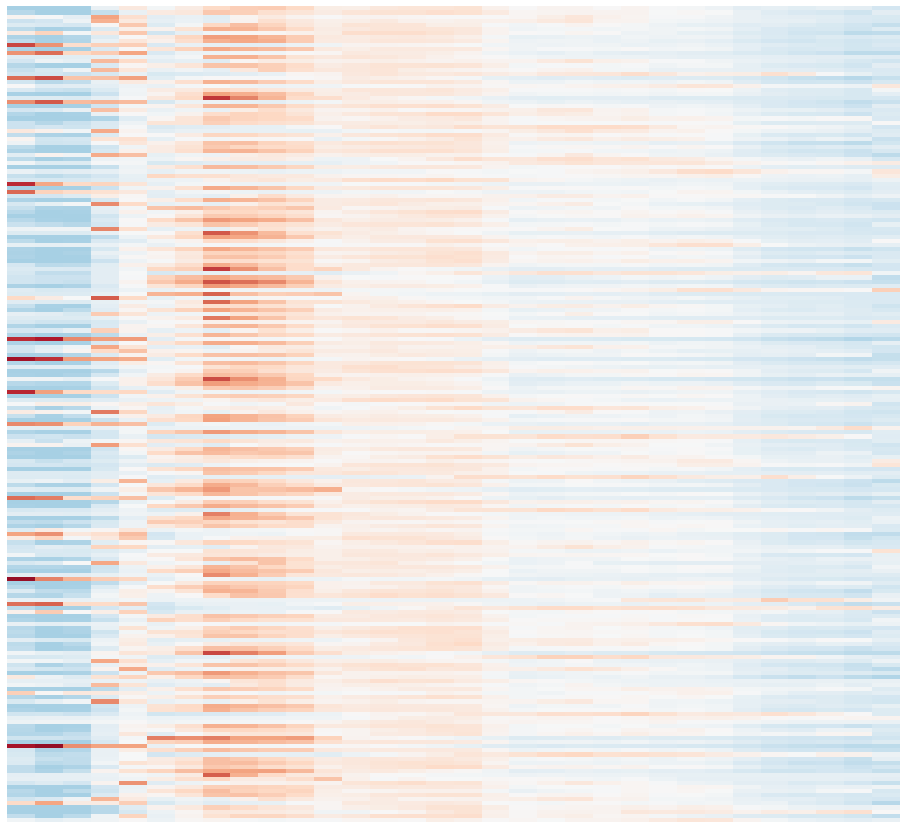

(32, 200)


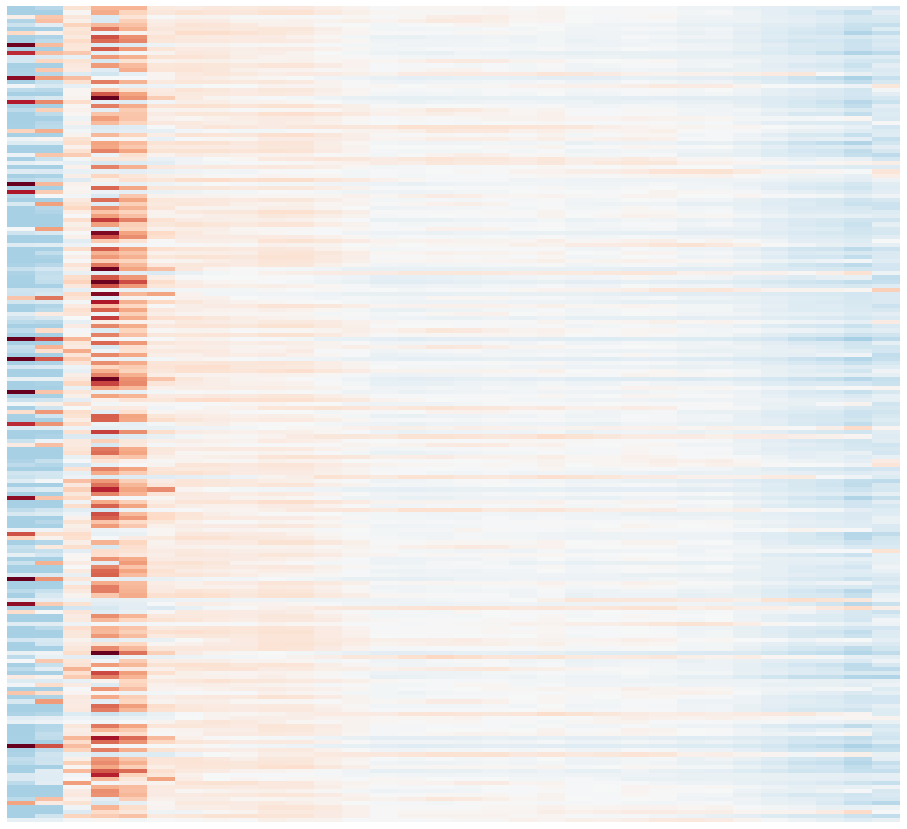

(32, 200)


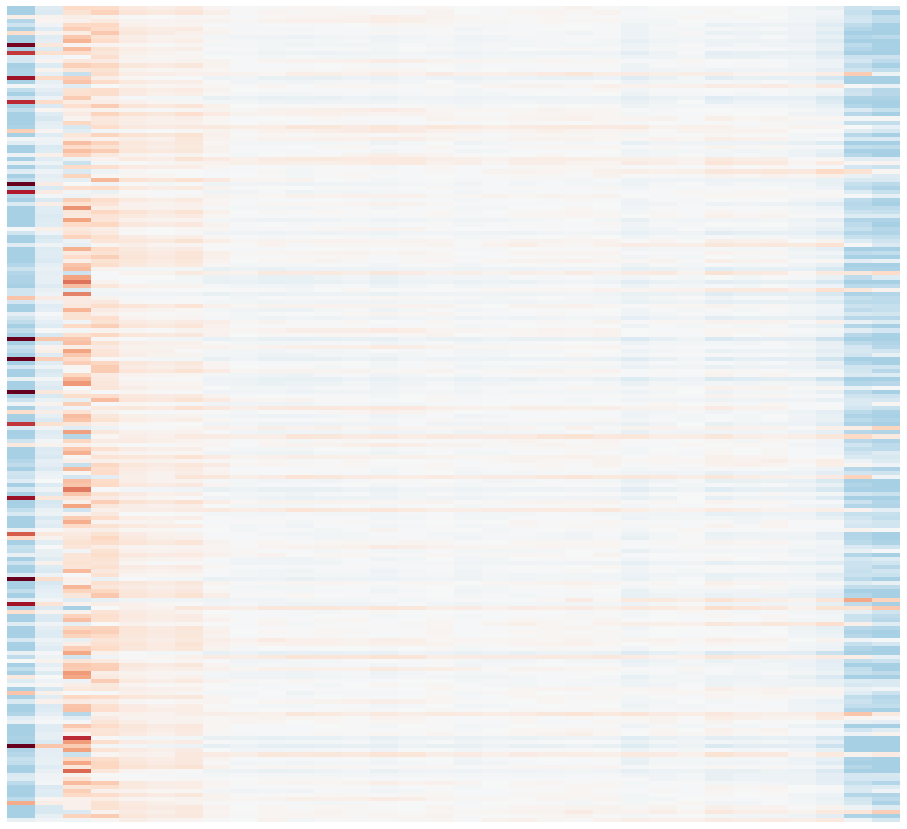

                             method seg_sol      corr
0        term_neurosynth_Percentile       1  0.215554
1        term_neurosynth_Percentile       1  0.091610
2        term_neurosynth_Percentile       1  0.318514
3        term_neurosynth_Percentile       1  0.070797
4        term_neurosynth_Percentile       1  0.207412
...                             ...     ...       ...
1586983        gclda_neuroquery_KDE      32 -0.091850
1586984        gclda_neuroquery_KDE      32 -0.040133
1586985        gclda_neuroquery_KDE      32  0.074754
1586986        gclda_neuroquery_KDE      32 -0.097176
1586987        gclda_neuroquery_KDE      32 -0.051282

[1586988 rows x 3 columns]


In [13]:

n_seg = 1
methods = ["Percentile", "KMeans", "KDE"]
dset_names = ["neurosynth", "neuroquery"]
models = ["term", "lda", "gclda"]

method_nm_lst = []
seg_sol_lst = []
corr_val_lst = []
# seg_sols = [f"{seg + 3:02d}" for seg in range(n_seg)]
seg_sols = ["03", "17", "32"]
hight = 15
for seg_sol in seg_sols:
    data_df = pd.DataFrame()
    for dset_name, model, method in itertools.product(dset_names, models, methods):
        corr_dir = op.join(dec_data_dir, f"{model}_{dset_name}_corr_{method}")
        corr_file = op.join(corr_dir, f"{seg_sol}_corr.npy")
        corr_arr = np.load(corr_file)

        # Plot heatmaps
        width = corr_arr.shape[0] * 0.5 - 1
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(width, hight)
        sns.heatmap(
            corr_arr.T,
            cmap="RdBu_r", 
            square=False, 
            cbar=False,
            center=0,
            vmin=-0.1, vmax=0.3,
            ax=ax,
        )
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        # ax.set_title(f"{segmentation_i + 3}")

        # plt.subplots_adjust(wspace=0.1)
        # fig.tight_layout()
        plt.savefig(op.join("./Fig", "decoding", f"heatmap-{seg_sol}_{model}_{dset_name}_{method}.eps"), bbox_inches="tight")
        plt.show()
        
        
        # Collect data for df
        n_elements = corr_arr.shape[0] * corr_arr.shape[1]
        method_nm_lst.append([f"{model}_{dset_name}_{method}"] * n_elements)
        seg_sol_sub = [[str(id+1)] * corr_arr.shape[1] for id in range(int(seg_sol))]
        seg_sol_lst.append(np.hstack(seg_sol_sub))
        corr_val_lst.append(corr_arr.flatten())
    
    method_nm_arr = np.hstack(method_nm_lst)
    seg_sol_arr = np.hstack(seg_sol_lst)
    corr_val_arr = np.hstack(corr_val_lst)

    data_df["method"] = method_nm_arr
    data_df["seg_sol"] = seg_sol_arr
    data_df["corr"] = corr_val_arr
    print(data_df)
    

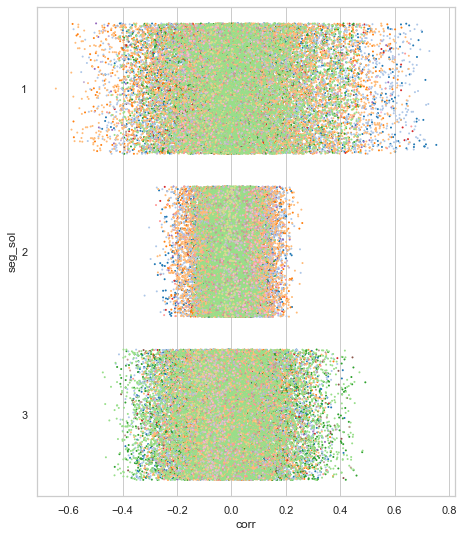

In [88]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7.5, 9)

sns.stripplot(
    data=data_df, 
    x="corr", 
    y="seg_sol", 
    hue="method", 
    jitter=0.4, 
    size=2, 
    ax=ax, 
    palette="tab20",
    hue_order=hue_order,    
)
plt.legend([],[], frameon=False)

(200, 3)
(200, 4)
(200, 5)


KeyboardInterrupt: 

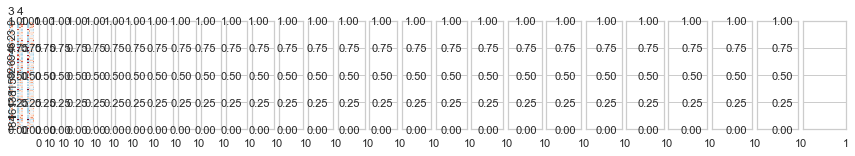

In [8]:

corrs_seg_fn = op.join(result_dir, "decoding", "gclda_corrs_segments.pkl")
corrs_segments_file = open(corrs_seg_fn, "rb")
corrs_seg_dict = pickle.load(corrs_segments_file)
sns.set(style="whitegrid")

segment_sizes = [corrs_seg.shape[1] for corrs_seg in corrs_seg_dict["kmeans_grad_segments"]]
segment_sizes = [segment_size/np.min(segment_sizes) for segment_size in segment_sizes]

n_segmentations = len(corrs_seg_dict["kmeans_grad_segments"])
# gs = gridspec.GridSpec(1, n_segmentations, width_ratios=segment_sizes)

fig, axes = plt.subplots(1, n_segmentations, gridspec_kw={'width_ratios': segment_sizes})
fig.set_size_inches(15, 2)

for segmentation_i in range(n_segmentations):
    print(corrs_seg_dict["kmeans_grad_segments"][segmentation_i].shape)
    sns.heatmap(
        corrs_seg_dict["kmeans_grad_segments"][segmentation_i], 
        cmap="RdBu_r", 
        square=False, 
        cbar=False,
        center=0,
        vmin=-0.1, vmax=0.3,
        ax=axes[segmentation_i],
    )
    axes[segmentation_i].set_yticklabels([])
    axes[segmentation_i].set_xticklabels([])
    axes[segmentation_i].set_title(f"{segmentation_i + 3}")

plt.subplots_adjust(wspace=0.1)
# fig.tight_layout()
plt.savefig(op.join("./Fig", "corr_matrices.eps"), bbox_inches="tight")
plt.show()
